In [1]:
import numpy as np
import os
os.chdir('./5-2/')
import w2v_utils

Using TensorFlow backend.


## cos_similarity, analogy, neutralize, equalize with pre-trained word vector

In [2]:
words, word_to_vec_map = w2v_utils.read_glove_vecs('./data/glove.6B.50d.txt')

In [3]:
print('len(words) =', len(words))
print('hello:\n', word_to_vec_map['hello'])

len(words) = 400000
hello:
 [-0.38497   0.80092   0.064106 -0.28355  -0.026759 -0.34532  -0.64253
 -0.11729  -0.33257   0.55243  -0.087813  0.9035    0.47102   0.56657
  0.6985   -0.35229  -0.86542   0.90573   0.03576  -0.071705 -0.12327
  0.54923   0.47005   0.35572   1.2611   -0.67581  -0.94983   0.68666
  0.3871   -1.3492    0.63512   0.46416  -0.48814   0.83827  -0.9246
 -0.33722   0.53741  -1.0616   -0.081403 -0.67111   0.30923  -0.3923
 -0.55002  -0.68827   0.58049  -0.11626   0.013139 -0.57654   0.048833
  0.67204 ]


In [4]:
def cos_similarity(u, v):
    
    '''return similarity'''

    similarity = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

    return similarity

In [5]:
father = word_to_vec_map['father']
mother = word_to_vec_map['mother']
ball = word_to_vec_map['ball']
crocodile = word_to_vec_map['crocodile']
france = word_to_vec_map['france']
italy = word_to_vec_map['italy']
paris = word_to_vec_map['paris']
rome = word_to_vec_map['rome']
print(f'cos_similarity(father, mother) = {cos_similarity(father, mother)}')
print(f'cos_similarity(ball, crocodile) = {cos_similarity(ball, crocodile)}')
print(f'cos_similarity(france-paris, italy-rome) = {cos_similarity(france-paris, italy-rome)}')

cos_similarity(father, mother) = 0.8909038442893618
cos_similarity(ball, crocodile) = 0.2743924626137943
cos_similarity(france-paris, italy-rome) = 0.6751479308174202


In [6]:
def analogy(a, b, c, word_to_vec_map=word_to_vec_map):
    
    '''a-->b analogy c-->d, return a best d'''

    a = a.lower()
    b = b.lower()
    c = c.lower()
    e_a = word_to_vec_map[a]
    e_b = word_to_vec_map[b]
    e_c = word_to_vec_map[c]
    e_d = e_c - e_a + e_b
    best_word = None
    max_similarity = -1
    for word in word_to_vec_map.keys():
        if word in [a, b, c]:
            continue
        sim = cos_similarity(e_d, word_to_vec_map[word])
        if sim > max_similarity:
            max_similarity = sim
            best_word = word
            
    return best_word

In [7]:
%time best_word1 = analogy('france', 'paris', 'italy')
print(f'france->paris analogy italy->{best_word1}')
%time best_word2 = analogy('japan', 'tokyo', 'china')
print(f'japan->tokyo analogy china->{best_word2}')
%time best_word3 = analogy('man', 'woman', 'boy')
print(f'man->woman analogy boy->{best_word3}')

Wall time: 4.42 s
france->paris analogy italy->rome
Wall time: 3.72 s
japan->tokyo analogy china->beijing
Wall time: 3.86 s
man->woman analogy boy->girl


In [8]:
# compute gender axis, direction: man-->woman
# cos_similarity(male, g) < 0
# cos_similarity(female, g) > 0
g = word_to_vec_map['woman'] - word_to_vec_map['man']
print(f'gender axis:\n{g}')

gender axis:
[-0.087144    0.2182     -0.40986    -0.03922    -0.1032      0.94165
 -0.06042     0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073     0.24337     0.08193    -1.02722    -0.21122
  0.695044   -0.00222     0.29106     0.5053     -0.099454    0.40445
  0.30181     0.1355     -0.0606     -0.07131    -0.19245    -0.06115
 -0.3204      0.07165    -0.13337    -0.25068714 -0.14293    -0.224957
 -0.149       0.048882    0.12191    -0.27362    -0.165476   -0.20426
  0.54376    -0.271425   -0.10245    -0.32108     0.2516     -0.33455
 -0.04371     0.01258   ]


In [9]:
names = ['john', 'marie', 'sophie', 'ronaldo', 'priya', 'rahul', 'danielle', 'reza', 'katy', 'yasmin']
for name in names:
    print('%-13s' % name, cos_similarity(word_to_vec_map[name], g))

john          -0.2316335614597372
marie         0.315597935396073
sophie        0.31868789859418784
ronaldo       -0.31244796850329437
priya         0.17632041839009405
rahul         -0.16915471039231722
danielle      0.24393299216283887
reza          -0.07930429672199552
katy          0.2831068659572615
yasmin        0.23313857767928753


In [10]:
word_list = ['lipstick', 'guns', 'science', 'arts', 'literature', 'warrior', \
'doctor', 'tree', 'receptionist', 'technology',  'fashion', 'teacher', \
'engineer', 'pilot', 'computer', 'singer']
for word in word_list:
    print('%-13s' % word, cos_similarity(word_to_vec_map[word], g))

lipstick 0.2769191625638267
guns          -0.1888485567898898
science       -0.060829065409296994
arts          0.008189312385880351
literature    0.0647250443345993
warrior       -0.20920164641125288
doctor        0.11895289410935038
tree          -0.07089399175478091
receptionist  0.3307794175059374
technology    -0.13193732447554296
fashion       0.03563894625772699
teacher       0.1792092343182567
engineer      -0.0803928049452407
pilot         0.0010764498991916926
computer      -0.10330358873850498
singer        0.1850051813649629


In [11]:
# unit_vector(g)
g_unit = g / (np.linalg.norm(g))
print(g_unit)

[-0.03348314  0.08383848 -0.15747955 -0.01506941 -0.0396523   0.36180799
 -0.02321504  0.12674902  0.17729802 -0.13817596  0.11950249 -0.33360183
  0.36888162  0.00412276  0.09350949  0.03147977 -0.39468635 -0.08115657
  0.26705514 -0.00085299  0.11183331  0.19415024 -0.03821298  0.15540088
  0.11596375  0.05206285 -0.0232842  -0.02739928 -0.07394462 -0.02349552
 -0.12310655  0.02752991 -0.05124444 -0.09632094 -0.05491766 -0.0864347
 -0.05724992  0.01878182  0.0468412  -0.10513238 -0.06358046 -0.07848234
  0.20892764 -0.104289   -0.03936412 -0.12336782  0.09667168 -0.12854337
 -0.01679459  0.00483358]


In [12]:
def neutralize(word, g_unit=g_unit, word_to_vec_map=word_to_vec_map):

    '''return e_disbiased'''

    e = word_to_vec_map[word.lower()]
    e_biascomponent = np.dot(e, g_unit) * g_unit # e在g_unit方向上的投影向量(分向量)
    e_disbiased = e - e_biascomponent

    return e_disbiased

In [13]:
w = 'receptionist'
e_w = word_to_vec_map[w]
e_disbiased_w = neutralize(w)
print(f'before neurealize cos_similarity(e_w, g) = {cos_similarity(e_w, g)}')
print(f'after neutralize cos_similarity(e_disbiased_w, g) = {cos_similarity(e_disbiased_w, g)}')

before neurealize cos_similarity(e_w, g) = 0.3307794175059374
after neutralize cos_similarity(e_disbiased_w, g) = 2.920516166121757e-17


In [14]:
def equalize(pair, g_unit=g_unit, word_to_vec_map=word_to_vec_map):

    '''return e1, e2'''

    w1, w2 = pair
    e_w1 = word_to_vec_map[w1.lower()]
    e_w2 = word_to_vec_map[w2.lower()]
    u = (e_w1 + e_w2) / 2.
    u_B = np.dot(u, g_unit) * g_unit
    u_orth = u - u_B
    e_1B = np.dot(e_w1, g_unit) * g_unit
    e_2B = np.dot(e_w2, g_unit) * g_unit
    e_1B_corrected = np.sqrt(np.abs(1 - np.linalg.norm(u_orth)**2)) * (e_1B - u_B) / np.abs(e_w1 - u)
    e_2B_corrected = np.sqrt(np.abs(1 - np.linalg.norm(u_orth)**2)) * (e_2B - u_B) / np.abs(e_w2 - u)
    e1 = e_1B_corrected + u_orth
    e2 = e_2B_corrected + u_orth

    return e1, e2

In [15]:
print('before equalize:')
man = word_to_vec_map['man']
woman = word_to_vec_map['woman']
print(f'cos_similarity(man, g) = {cos_similarity(man, g)}')
print(f'cos_similarity(woman, g) = {cos_similarity(woman, g)}')
print('\nafter equalize:')
e_man, e_woman = equalize(('man', 'woman'))
print(f'cos_similarity(e_man, g) = {cos_similarity(e_man, g)}')
print(f'cos_similarity(e_woman, g) = {cos_similarity(e_woman, g)}')

before equalize:
cos_similarity(man, g) = -0.1171109576533683
cos_similarity(woman, g) = 0.3566661884627037

after equalize:
cos_similarity(e_man, g) = -0.7165727525843935
cos_similarity(e_woman, g) = 0.7396596474928909


## Emojifier-V1

In [16]:
import emo_utils

In [17]:
import matplotlib.pyplot as plt

In [18]:
X_train, Y_train = emo_utils.read_csv('./data/train_emoji.csv')
X_test, Y_test = emo_utils.read_csv('./data/test.csv')

In [19]:
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {Y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'Y_test.shape = {Y_test.shape}')

X_train.shape = (132,)
Y_train.shape = (132,)
X_test.shape = (56,)
Y_test.shape = (56,)


In [20]:
maxlen = len(max(X_train, key=len).split())
print(maxlen)
print(max(X_train, key=len))

10
I am so impressed by your dedication to this project


In [21]:
print(X_train[0], emo_utils.label_to_emoji(Y_train[0]))

never talk to me again 😞


In [22]:
Y_oh_train = emo_utils.convert_to_one_hot(Y_train, 5)
Y_oh_test = emo_utils.convert_to_one_hot(Y_test, 5)
print(f'Y_oh_train.shape = {Y_oh_train.shape}')
print(f'Y_oh_test.shape = {Y_oh_test.shape}')

Y_oh_train.shape = (132, 5)
Y_oh_test.shape = (56, 5)


In [23]:
word_to_index, index_to_word, word_to_vec_map = emo_utils.read_glove_vecs('./data/glove.6B.50d.txt')

In [24]:
def sentence_to_avg(sentence, word_to_vec_map=word_to_vec_map):

    '''return avg_vector'''

    words = sentence.lower().split()
    vectors = [word_to_vec_map[word] for word in words]
    avg_vector = np.mean(vectors, axis=0)

    return avg_vector

In [25]:
print(sentence_to_avg(X_train[0]))

[ 9.718460e-02  1.743740e-02  5.284300e-02 -4.368060e-01  2.756132e-01
 -1.426688e-01 -6.120520e-01  4.716140e-01 -6.059740e-01  1.566594e-01
 -8.662400e-02  4.906620e-01 -6.480320e-01 -1.612960e-01  8.897200e-01
  4.867520e-01  4.601260e-02 -8.363342e-02 -2.288840e-01 -4.151500e-01
 -1.140000e-02  6.407600e-01  5.954280e-01  1.780868e-01  7.128668e-01
 -2.072760e+00 -3.161338e-01  1.869920e-01  6.583040e-01 -6.969300e-01
  3.172380e+00  5.411100e-01 -5.941440e-01 -3.028740e-01 -2.285386e-01
 -2.899120e-01  2.006040e-01  1.053064e-01 -3.933000e-02 -4.483020e-01
 -1.353596e-01 -2.031200e-03 -2.454976e-01  1.305460e-01 -1.976000e-02
  2.025340e-02 -1.199070e-01 -2.522034e-01 -2.197784e-01  3.076060e-01]


In [26]:
def model(X, Y, word_to_vec_map=word_to_vec_map, lr=0.02, epochs=4000):

    '''X - (m, None) --> (50, m), Y - onehot(m, 5) --> (5, m)
    np.dot(W, X) + b --> Y_hat
    return W - (5, 50), b - (5, 1)'''

    m = X.shape[0]
    x = np.zeros((m, 50))   # avg_vectors
    for i in range(m):
        x[i] = sentence_to_avg(X[i])
    x = x.T # (m, 50) --> (50, m)
    y = Y.T # (m, 5) --> (5, m)
    W = np.random.randn(5, 50) * np.sqrt(2/50)
    b = np.zeros((5, 1))
    cost = []
    for j in range(epochs):
        z = np.dot(W, x) + b    # (5, m)
        a = np.exp(z - np.max(z, axis=0, keepdims=True)) / np.sum(np.exp(z - np.max(z, axis=0, keepdims=True)), axis=0, keepdims=True)  # (5, m)
        J = np.sum(-y * np.log(a)) / m
        cost.append(J)
        dz = a - y
        dW = np.dot(dz, x.T)
        db = np.sum(dz, axis=1, keepdims=True)
        W -= lr * dW
        b -= lr * db
        if j % 500 == 0:
            print(f'No.{j+1} epoch loss: {J}')
    print(f'No.{j+1} epoch loss: {J}')
    plt.plot(cost)
    plt.title('loss')
    plt.show()
    return W, b

No.1 epoch loss: 1.659702377209073
No.501 epoch loss: 0.1005125172345228
No.1001 epoch loss: 0.06769721417785338
No.1501 epoch loss: 0.05273721165860178
No.2001 epoch loss: 0.04312412413861995
No.2501 epoch loss: 0.03642038926812721
No.3001 epoch loss: 0.03147776062918383
No.3501 epoch loss: 0.027684750908939165
No.4000 epoch loss: 0.02469054256688649


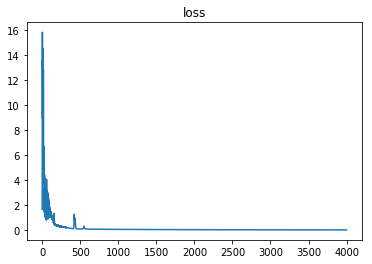

In [27]:
W, b = model(X_train, Y_oh_train, word_to_vec_map=word_to_vec_map, lr=0.02, epochs=4000)

In [31]:
def predict(X, Y, W, b, word_to_vec_map=word_to_vec_map):

    '''X - sentences(m, None) --> (50, m), Y - labels(m,)
    W - (5, 50), b - (5, 1)
    np.dot(W, X) + b --> z, a, y_hat
    return y_hat'''

    m = X.shape[0]
    x = np.zeros((m, 50))   # avg_vectors
    for i in range(m):
        x[i] = sentence_to_avg(X[i])
    x = x.T # (m, 50) --> (50, m)
    z = np.dot(W, x) + b    # (5, m)
    a = np.exp(z - np.max(z, axis=0, keepdims=True)) / np.sum(np.exp(z - np.max(z, axis=0, keepdims=True)), axis=0, keepdims=True)  # (5, m)
    y_hat = np.argmax(a, axis=0)    # (m,)
    acc = np.mean(y_hat == Y)
    print(f'Accuracy: {acc}')
    return y_hat

### train set:

In [32]:
y_hat = predict(X_train, Y_train, W, b)

Accuracy: 1.0


### test set:

In [34]:
y_hat = predict(X_test, Y_test, W, b)

Accuracy: 0.9107142857142857


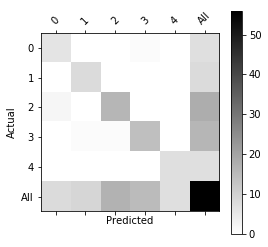

In [36]:
emo_utils.plot_confusion_matrix(Y_test, y_hat, title='Confusion matrix', cmap=plt.cm.gray_r)

In [38]:
import pandas as pd
print(pd.crosstab(Y_test, y_hat, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted  0  1   2   3  4  All
Actual                         
0          6  0   0   1  0    7
1          0  8   0   0  0    8
2          2  0  16   0  0   18
3          0  1   1  14  0   16
4          0  0   0   0  7    7
All        8  9  17  15  7   56


In [35]:
my_X = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "you are not happy"])
my_Y = np.array([0, 0, 2, 1, 4, 3])
pred = predict(my_X, my_Y, W, b)
emo_utils.print_predictions(my_X, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
you are not happy ❤️


## Emojifiter-V2 with LSTM

In [53]:
import keras
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

In [43]:
def sentences_to_indices(X, word_to_index=word_to_index, maxlen=maxlen):

    '''X - sentence array(m, )
    return X_indices - (m, maxlen)'''

    m = X.shape[0]
    X_indices = np.zeros((m, maxlen))
    for i in range(m):
        x = X[i].lower().split()
        l = len(x)
        x_indices = [word_to_index[w] for w in x]
        X_indices[i][:l] = x_indices

    return X_indices

In [46]:
print(sentences_to_indices(np.array(['i love you', 'i hate you', 'I am so impressed by your dedication to this project'])))

[[185457. 226278. 394475.      0.      0.      0.      0.      0.      0.
       0.]
 [185457. 174339. 394475.      0.      0.      0.      0.      0.      0.
       0.]
 [185457.  52943. 336114. 188347.  88126. 394565. 119051. 360915. 358160.
  293229.]]


In [62]:
def pretrained_embedding_layer(word_to_vec_map=word_to_vec_map, word_to_index=word_to_index):

    '''return embedding_layer'''

    input_dim = len(word_to_index) + 1  # vocab length (add 0: None)
    output_dim = word_to_vec_map['love'].shape[0]   # word vector length: 50
    # sequence_length = input_length = maxlen
    
    emb_matrix = np.zeros((input_dim, output_dim))

    for word, index in word_to_index.items():
        emb_matrix[index] = word_to_vec_map[word]

    embedding_layer = Embedding(input_dim, output_dim, embeddings_initializer=Constant(value=emb_matrix), trainable=False)
    
    return embedding_layer

In [69]:
def Emojify_V2(input_shape=(10,), word_to_vec_map=word_to_vec_map, word_to_index=word_to_index):

    '''input_shape - without batchsize, (sequence_length,)
    return model'''

    sentence_indices = Input(input_shape)
    embedding_layer = pretrained_embedding_layer()
    embeddings = embedding_layer(sentence_indices)
    x = LSTM(128, return_sequences=True)(embeddings)
    x = Dropout(0.5)(x)
    x = LSTM(128, return_sequences=False)(x)
    x = Dropout(0.5)(x)
    x = Dense(5, activation='softmax')(x)
    model = Model(inputs=sentence_indices, outputs=x)

    return model

In [72]:
model = Emojify_V2()
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
X_train_indices = sentences_to_indices(X_train) # (None, maxlen)
model.fit(X_train_indices, Y_oh_train, epochs=50, batch_size=32, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
132/132 [==============================] - 9s 65ms/step - loss: 1.5772 - acc: 0.2803
Epoch 2/50
132/132 [==============================] - 1s 5ms/step - loss: 1.5141 - acc: 0.3106
Epoch 3/50
132/132 [==============================] - 1s 4ms/step - loss: 1.4844 - acc: 0.3561
Epoch 4/50
132/132 [==============================] - 1s 5ms/step - loss: 1.3852 - acc: 0.5227
Epoch 5/50
132/132 [==============================] - 1s 5ms/step - loss: 1.3115 - acc: 0.5455
Epoch 6/50
132/132 [==============================] - 1s 4ms/step - loss: 1.1960 - acc: 0.5985
Epoch 7/50
132/132 [==============================] - 1s 5ms/step - loss: 1.0635 - acc: 0.6288
Epoch 8/50
132/132 [==============================] - 1s 5ms/step - loss: 0.8655 - acc: 0.7121
Epoch 9/50
132/132 [==============================] - 1s 6ms/step - loss: 0.9126 - acc: 0.6515
Epoch 10/50
132/132 [=============================

In [76]:
X_test_indices = sentences_to_indices(X_test)
loss, acc = model.evaluate(X_test_indices, Y_oh_test)
print(f'test accuracy = {acc}') 

56/56 [==============================] - 1s 20ms/step
test accuracy = 0.875


In [81]:
pred = model.predict(X_test_indices)    # (None, 5), Y_test - (None,)
y_pred = np.argmax(pred, axis=1) # (None,)
for i in range(len(Y_test)):
    if y_pred[i] != Y_test[i]:
        print(f'Actual: {emo_utils.label_to_emoji(Y_test[i])}\tPredict: {X_test[i]}{emo_utils.label_to_emoji(y_pred[i])}')

Actual: 😞	Predict: This girl is messing with me	❤️
Actual: ❤️	Predict: I love taking breaks	😞
Actual: 😄	Predict: you brighten my day	❤️
Actual: 😞	Predict: she is a bully	❤️
Actual: 😞	Predict: My life is so boring	❤️
Actual: 😄	Predict: will you be my valentine	❤️
Actual: 😞	Predict: go away	⚾


In [86]:
my_X = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "you are not happy"])
my_X_indices = sentences_to_indices(my_X)
my_Y = np.array([0, 0, 2, 1, 4, 3])
pred = model.predict(my_X_indices)
y_pred = np.argmax(pred, axis=1) # (None,)
for i in range(len(my_Y)):
    print(f'Actual: {emo_utils.label_to_emoji(my_Y[i])}\tPredict: {my_X[i]} {emo_utils.label_to_emoji(y_pred[i])}')

Actual: ❤️	Predict: i adore you ❤️
Actual: ❤️	Predict: i love you ❤️
Actual: 😄	Predict: funny lol 😄
Actual: ⚾	Predict: lets play with a ball ⚾
Actual: 🍴	Predict: food is ready 🍴
Actual: 😞	Predict: you are not happy 😞


### LSTM-Model seems solve the problem AvgDNN-Model had at 'you are not happy'.